In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/greater-noida-pg-accommodation-rent-price/cleanedDataset.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Rent,Occupancy,Attached BathRoom,AB,TV,AC,CUPBOARD,BEDDING,GEASER
0,5000,2,0,1,0,1,1,1,1
1,11000,1,0,0,0,0,0,0,0
2,7000,2,0,0,0,0,0,0,0
3,6500,3,0,0,0,0,0,0,0
4,15000,1,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'Plot showing relatoinship between No. of people sharing the room and rent of the room'}, xlabel='Occupancy', ylabel='Rent'>

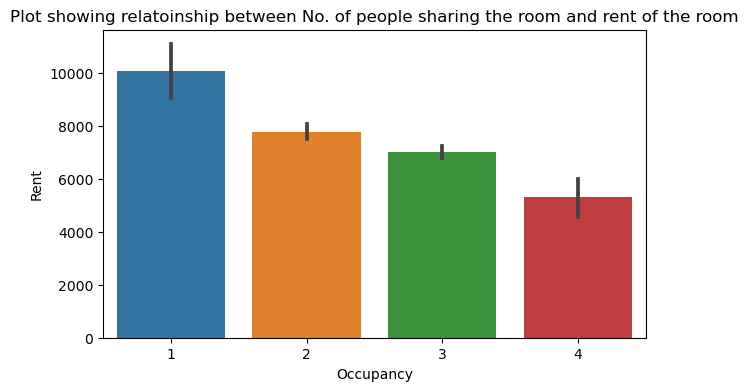

In [42]:
plt.figure(figsize=(7,4))
plt.title("Plot showing relatoinship between No. of people sharing the room and rent of the room")
sns.barplot(y=df['Rent'], x=df['Occupancy'])

<AxesSubplot:title={'center':'Plot showing relatoinship between No. of people sharing the room and rent of the room'}, xlabel='Occupancy', ylabel='Rent'>

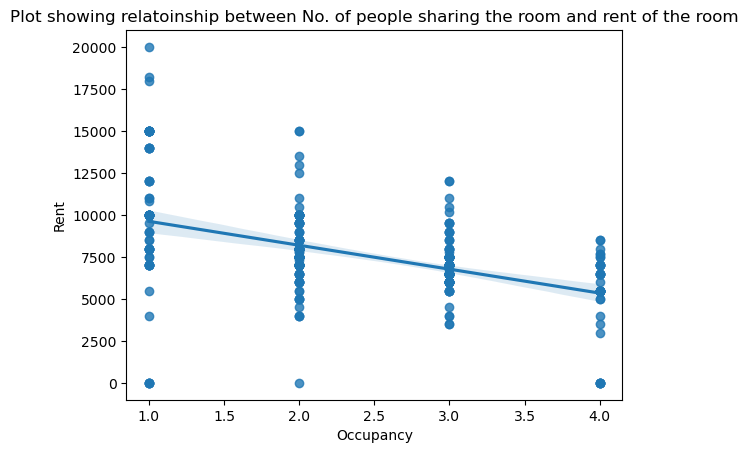

In [44]:
plt.title("Plot showing relatoinship between No. of people sharing the room and rent of the room")
sns.regplot(y=df['Rent'], x=df['Occupancy'])

<AxesSubplot:xlabel='Attached BathRoom', ylabel='Rent'>

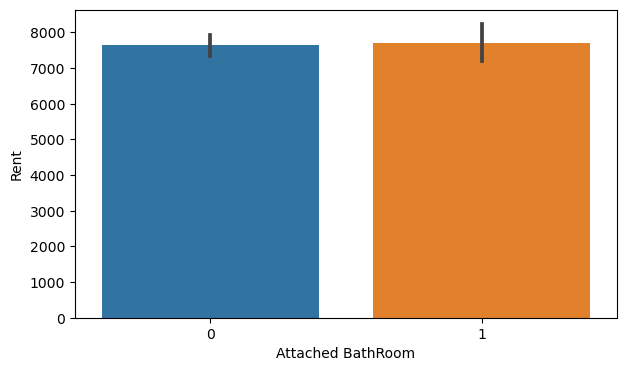

In [68]:
# Plot showing relatoinship between existence of attached bathroom and rent of the room
plt.figure(figsize=(7,4))
sns.barplot(x=df['Attached BathRoom'], y=df['Rent'])

<AxesSubplot:xlabel='AB', ylabel='Rent'>

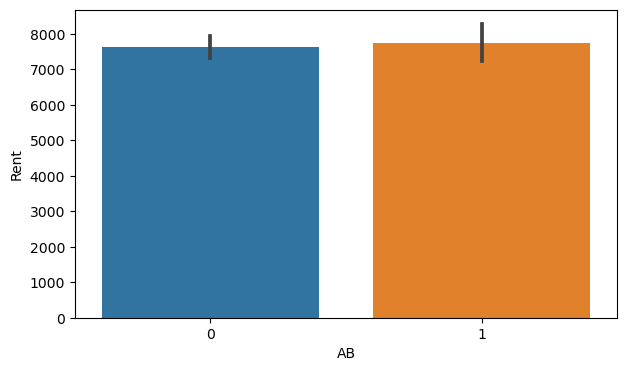

In [46]:
# Plot showing relatoinship between existence of AB and rent of the room
plt.figure(figsize=(7,4))
sns.barplot(x=df['AB'], y=df['Rent'])

<AxesSubplot:xlabel='TV', ylabel='Rent'>

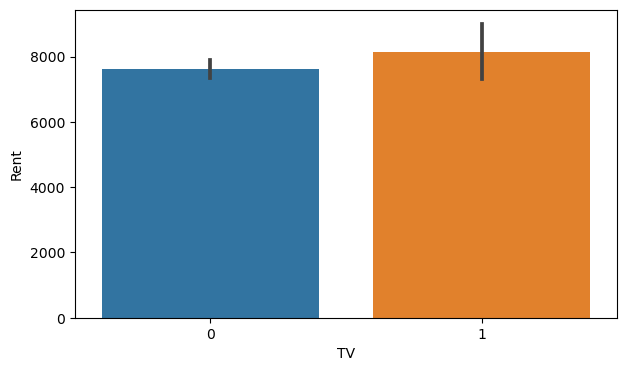

In [69]:
# Plot showing relatoinship between existence of TV and rent of the room
plt.figure(figsize=(7,4))
sns.barplot(x=df['TV'], y=df['Rent'])

<AxesSubplot:xlabel='AC', ylabel='Rent'>

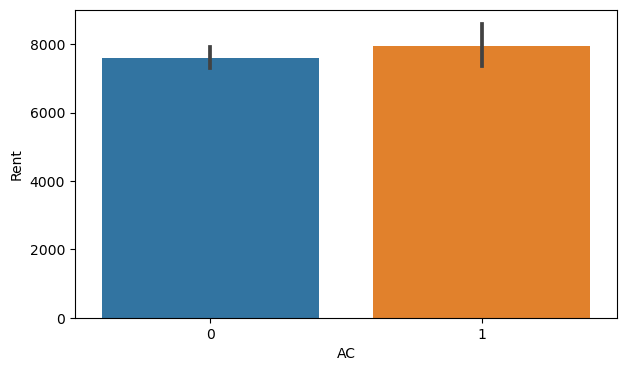

In [71]:
# Plots showing relatoinship between existence of AC and rent of the room
plt.figure(figsize=(7,4))
sns.barplot(x=df['AC'], y=df['Rent'])

<AxesSubplot:xlabel='AC', ylabel='Rent'>

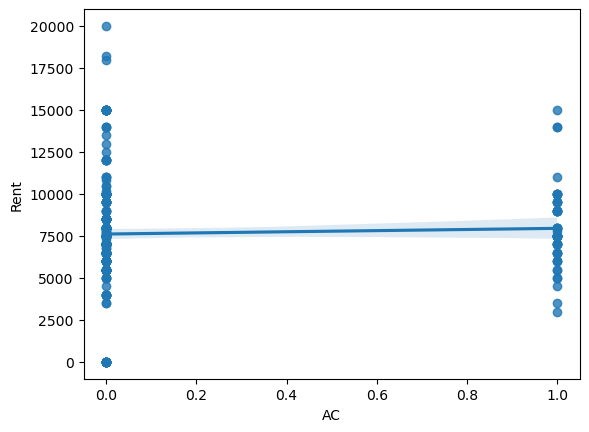

In [56]:
sns.regplot(x=df['AC'], y=df['Rent'])

<AxesSubplot:xlabel='CUPBOARD', ylabel='Rent'>

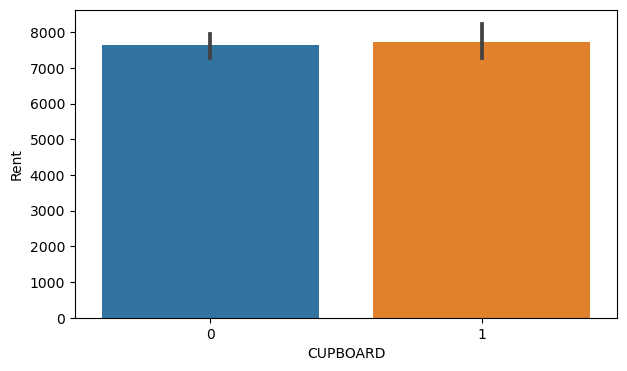

In [49]:
# Plot showing relatoinship between existence of cupboard and rent of the room
plt.figure(figsize=(7,4))
sns.barplot(x=df['CUPBOARD'], y=df['Rent'])

<AxesSubplot:xlabel='BEDDING', ylabel='Rent'>

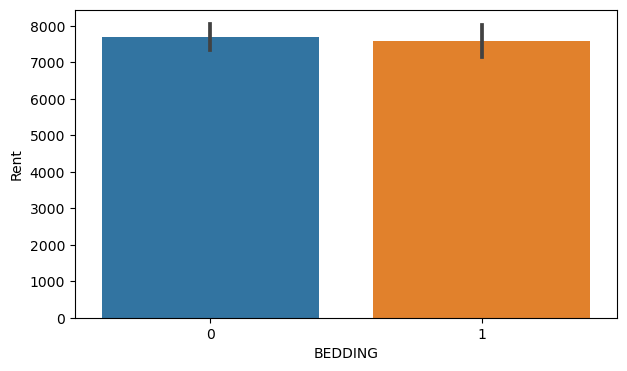

In [50]:
# Plot showing relatoinship between existence of beds and rent of the room
plt.figure(figsize=(7,4))
sns.barplot(x=df['BEDDING'], y=df['Rent'])

<AxesSubplot:xlabel='GEASER', ylabel='Rent'>

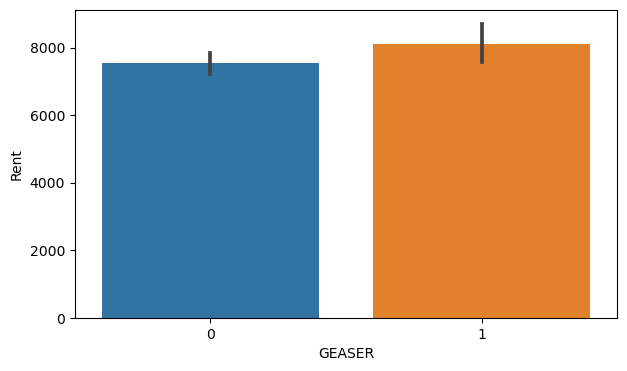

In [51]:
# Plot showing relatoinship between existence of geaser and rent of the room
plt.figure(figsize=(7,4))
sns.barplot(x=df['GEASER'], y=df['Rent'])

<AxesSubplot:xlabel='GEASER', ylabel='Rent'>

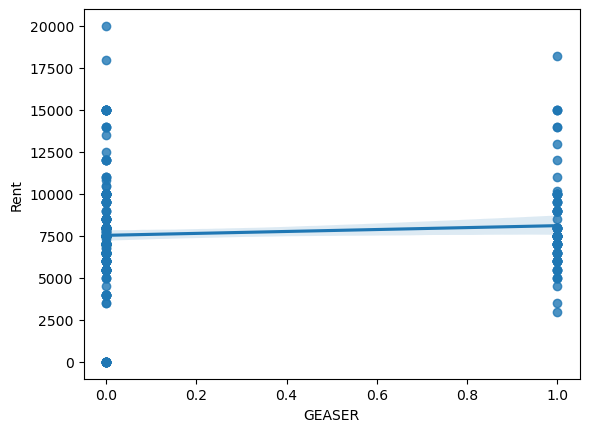

In [57]:
sns.regplot(x=df['GEASER'], y=df['Rent'])

In [72]:
y = df.Rent
independent = ['Occupancy','GEASER']
x = df[independent]
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(x, y,random_state = 0)


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, preds))


1314.3037095657191


In [74]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=5)
xgb_model.fit(train_X, train_y, 
              eval_set=[(val_X, val_y)], 
              verbose=False)
predictions = xgb_model.predict(val_X)
print(mean_absolute_error(val_y, predictions))


1309.7849885574494
